In [9]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import itertools

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_970d7ba142a64539a0cad45ff96ea70f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KZBRGjZvg52oLS7JlVRDj7Lhi91Evv-FX5Q5aScfcOj_',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_970d7ba142a64539a0cad45ff96ea70f.get_object(Bucket='courseracapstone-donotdelete-pr-8t1monwcsulgit',Key='Loan payments data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1



,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


In [2]:
df_data_1['loan_status'].value_counts()

PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: loan_status, dtype: int64

In [14]:
df_data_1['due_date'] = pd.to_datetime(df_data_1['due_date'])
df_data_1['effective_date'] = pd.to_datetime(df_data_1['due_date'])
df_data_1['paid_off_time'] = pd.to_datetime(df_data_1['paid_off_time'])
df_data_1.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-10-07,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-10-07,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-10-07,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-22,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-10-08,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female


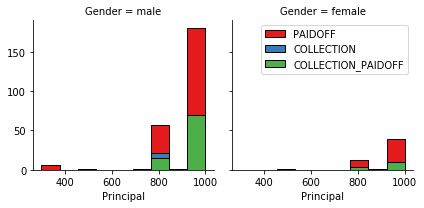

In [10]:

import seaborn as sns
bins = np.linspace(df_data_1.Principal.min(), df_data_1.Principal.max(), 10)
g = sns.FacetGrid(df_data_1, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

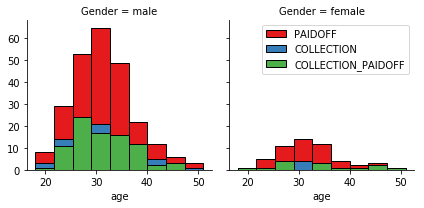

In [12]:
bins = np.linspace(df_data_1.age.min(), df_data_1.age.max(), 10)
g = sns.FacetGrid(df_data_1, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Now seeing the day of the week people take the loan


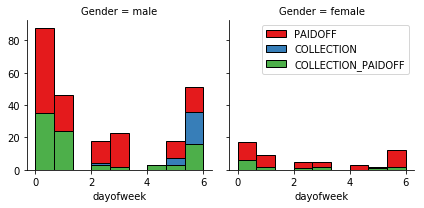

In [16]:

df_data_1['dayofweek'] = df_data_1['effective_date'].dt.dayofweek
bins = np.linspace(df_data_1.dayofweek.min(), df_data_1.dayofweek.max(), 10)
g = sns.FacetGrid(df_data_1, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that most of the people take loans on Monday. Lets see it now monthwise


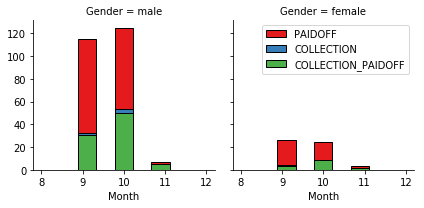

In [20]:
df_data_1['Month'] = df_data_1.due_date.dt.month
bins = np.linspace(df_data_1.Month.min()-1, df_data_1.Month.max()+1, 10)
g = sns.FacetGrid(df_data_1, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()




We see that between the months of January to August. No one ever pays their loan , or even in the month of December. So 
we can remove them from the dataset.
as the observation shows people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4.

In [21]:
df_data_1['weekend'] = df_data_1['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_data_1.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,dayofweek,Month,weekend
0,xqd20166231,PAIDOFF,1000,30,2016-10-07,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male,4,10,1
1,xqd20168902,PAIDOFF,1000,30,2016-10-07,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female,4,10,1
2,xqd20160003,PAIDOFF,1000,30,2016-10-07,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female,4,10,1
3,xqd20160004,PAIDOFF,1000,15,2016-09-22,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male,3,9,0
4,xqd20160005,PAIDOFF,1000,30,2016-10-08,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female,5,10,1



Convert Categorical features to numerical values
Lets look at gender:


In [22]:
df_data_1.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status       
female  PAIDOFF               0.688312
        COLLECTION_PAIDOFF    0.181818
        COLLECTION            0.129870
male    PAIDOFF               0.583924
        COLLECTION            0.212766
        COLLECTION_PAIDOFF    0.203310
Name: loan_status, dtype: float64

Lets convert Male and Female to binary (0 for Male and 1 for female)

In [23]:
df_data_1['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_data_1.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,dayofweek,Month,weekend
0,xqd20166231,PAIDOFF,1000,30,2016-10-07,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,0,4,10,1
1,xqd20168902,PAIDOFF,1000,30,2016-10-07,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,1,4,10,1
2,xqd20160003,PAIDOFF,1000,30,2016-10-07,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,1,4,10,1
3,xqd20160004,PAIDOFF,1000,15,2016-09-22,2016-09-22,2016-09-22 20:00:00,NaN,27,college,0,3,9,0
4,xqd20160005,PAIDOFF,1000,30,2016-10-08,2016-10-08,2016-09-23 21:36:00,NaN,28,college,1,5,10,1


Our data already has a column for past_due_date, so we can use this column get more insight information


Let's try grouping by education


In [24]:

df_data_1.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status       
Bechalor              PAIDOFF               0.611940
                      COLLECTION_PAIDOFF    0.223881
                      COLLECTION            0.164179
High School or Below  PAIDOFF               0.588517
                      COLLECTION            0.234450
                      COLLECTION_PAIDOFF    0.177033
Master or Above       PAIDOFF               0.750000
                      COLLECTION            0.250000
college               PAIDOFF               0.604545
                      COLLECTION_PAIDOFF    0.218182
                      COLLECTION            0.177273
Name: loan_status, dtype: float64

In [25]:
len(df_data_1[df_data_1.education=='Master or Above'])

4

In [47]:
len(df_data_1[df_data_1.education=='college'])

220

We can see that there are only 4 people have education level Masters or Above, so we can remove them.

In [29]:


Feature = df_data_1[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df_data_1['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,1,4,0,1,0
1,1000,30,50,1,1,4,1,0,0
2,1000,30,33,1,1,4,1,0,0
3,1000,15,27,0,0,3,0,0,1
4,1000,30,28,1,1,5,0,0,1


In [30]:
y = df_data_1['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION','COLLECTION_PAIDOFF'], value=[0,1,2]).values
y[0:5]

array([0, 0, 0, 0, 0])

In [32]:
X = Feature

X= preprocessing.StandardScaler().fit_transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.49337687,  0.89789115,  2.28404253, -0.42665337,  1.43135617,
         0.66912123, -0.39336295,  1.17997648, -0.88640526],
       [ 0.49337687,  0.89789115,  3.10658738,  2.34382305,  1.43135617,
         0.66912123,  2.54218146, -0.84747452, -0.88640526],
       [ 0.49337687,  0.89789115,  0.3099349 ,  2.34382305,  1.43135617,
         0.66912123,  2.54218146, -0.84747452, -0.88640526],
       [ 0.49337687, -0.97897162, -0.67711892, -0.42665337, -0.69863813,
         0.26457393, -0.39336295, -0.84747452,  1.12815215],
       [ 0.49337687,  0.89789115, -0.51260995,  2.34382305,  1.43135617,
         1.07366852, -0.39336295, -0.84747452,  1.12815215]])

In [33]:
# import scoring methods
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score


# our data for training (used '_train' just for improving readability)
X_train, y_train=X,y
X_train.shape, y_train.shape

((500, 9), (500,))

K Nearest Neighbor (KNN)


In [45]:
from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv=99)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 10 | Cross validation Accuracy : 0.581060606060606


In [43]:
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_train)
trainScores={}

In [46]:
trainScores['KNN-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')
trainScores

{'KNN-jaccard': 0.626, 'KNN-f1-score': 0.5454449278286644}

ValueError: x and y must have same first dimension, but have shapes (9,) and (11,)

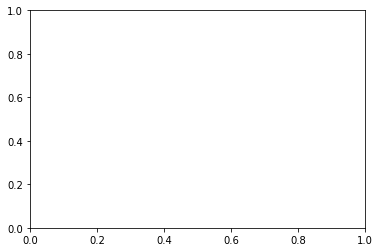

In [48]:

plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

In [49]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

y_pred=clf_tree.predict(X_train)

In [50]:
trainScores['Tree-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')

In [51]:
trainScores


{'KNN-jaccard': 0.626,
 'KNN-f1-score': 0.5454449278286644,
 'Tree-jaccard': 0.886,
 'Tree-f1-score': 0.8826452819332566}

Visualising the Tree

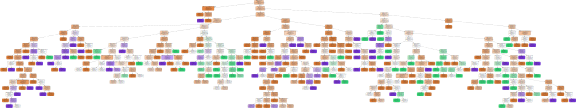

In [54]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=['Principal',
                                    'terms','age',
                                    'Gender',
                                    'weekend',
                                    'Bechalor',
                                    'High School or Below',
                                    'college',
                                    'dayofweek',
                                     #'deadline'
#                                     ,'Month'
                                   ],  
                     class_names='loan_status',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

Support Vector Machine

In [55]:
y_train=y_train.astype(float)

In [64]:
from sklearn import svm

clf_svm = svm.LinearSVC(random_state=20)
clf_svm.fit(X_train, y_train)  

y_pred=clf_svm.predict(X_train)

In [65]:
trainScores['SVM-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
trainScores

{'KNN-jaccard': 0.626,
 'KNN-f1-score': 0.5454449278286644,
 'Tree-jaccard': 0.886,
 'Tree-f1-score': 0.8826452819332566,
 'SVM-jaccard': 0.592,
 'SVM-f1-score': 0.4786458333333333}

Logistic Regression


In [82]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=30, solver='lbfgs',
                         multi_class='multinomial')
clf_log.fit(X_train, y_train)

y_pred=clf_log.predict(X_train)
y_proba=clf_log.predict_proba(X_train)


In [83]:


trainScores['LogReg-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
trainScores['LogReg-logLoss']=log_loss(y_train, y_proba)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
trainScores

{'KNN-jaccard': 0.626,
 'KNN-f1-score': 0.5454449278286644,
 'Tree-jaccard': 0.886,
 'Tree-f1-score': 0.8826452819332566,
 'SVM-jaccard': 0.592,
 'SVM-f1-score': 0.4786458333333333,
 'LogReg-jaccard': 0.594,
 'LogReg-f1-score': 0.4862490014835102,
 'LogReg-logLoss': 0.8903423237978315}

In [85]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-a2aedda3-3ddb-44ad-b686-0bbefa607ca8',
    'IBM_API_KEY_ID': 'KZBRGjZvg52oLS7JlVRDj7Lhi91Evv-FX5Q5aScfcOj_',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-gb.bluemix.net/oidc/token',
    'BUCKET': 'courseracapstone-donotdelete-pr-8t1monwcsulgit',
    'FILE': 'Loan_test.csv'
}
 

In [98]:

body = client_970d7ba142a64539a0cad45ff96ea70f.get_object(Bucket='courseracapstone-donotdelete-pr-8t1monwcsulgit',Key='Loan_Test1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_df = pd.read_csv(body)
test_df.head()

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# test_df['Month'] = test_df.due_date.dt.month 

# test_df['deadline']=test_df['due_date']-test_df['effective_date']
# test_df['deadline']=test_df['deadline'].dt.days

Feature = test_df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature

y = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values

testy=y.astype(float)
testX= preprocessing.StandardScaler().fit_transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [87]:
testScores={}


In [99]:

knn_pred=clf_knn.predict(testX)
testScores['KNN-jaccard']=jaccard_similarity_score(testy, knn_pred)
testScores['KNN-f1-score']=f1_score(testy, knn_pred, average='weighted')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [92]:
tree_pred=clf_tree.predict(testX)
testScores['Tree-jaccard']=jaccard_similarity_score(testy, tree_pred)
testScores['Tree-f1-score']=f1_score(testy, tree_pred, average='weighted')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [93]:

svm_pred=clf_svm.predict(testX)
testScores['SVM-jaccard']=jaccard_similarity_score(testy, svm_pred)
testScores['SVM-f1-score']=f1_score(testy, svm_pred, average='weighted')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [94]:
log_pred=clf_log.predict(testX)
proba=clf_log.predict_proba(testX)
testScores['LogReg-jaccard']=jaccard_similarity_score(testy, log_pred)
testScores['LogReg-f1-score']=f1_score(testy, log_pred, average='weighted')  
testScores['LogReg-logLoss']=log_loss(testy, proba)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [95]:
testScores

{}